# DAY 4

##### Covers the following topics:
##### Synthetic data generation, Adding noise and cleaning data

In [2]:
import numpy as np
import pandas as pd

In [3]:
Random_State = 42
np.random.seed(Random_State)

In [4]:
n_samples = 5000

#### Parameters
1. age
2. income         
3. emp years  
4. credit score  
5. existing loans 
6. debt to income
7. loan amount  
8. interest rate  
9. duration i.e. loan tenure 


#### Target calculation:
risk score = (
    (900 - credit_score) * 0.4 +
    debt_to_income * 300 +
    existing_loans * 50 +
    (loan_amount / annual_income) * 200 +
    (interest_rate - 8) * 10
)

Here,
900-credit_score*0.4  -more credit score means more chances of getting loan
900-750 = 150 * 0.4 = 60 -risk points

 debt to income * 300 gives another risk point
 all these values are responsible for risk points

In [5]:
age = np.random.randint(21, 65, n_samples)
# Normal distribution is a  bell-shaped curve where most values are around mean,
# here mean is 800000 and std deviation 300000
annual_income = np.random.normal(800000, 300000, n_samples).clip(200000, None)
employment_years = np.random.randint(0, 40, n_samples)
# Values are clipped btwn 300, 900 to stay within range
credit_score = np.random.normal(680, 60, n_samples).clip(300, 900)
# Poisson dist models the number of events like loan in a fixed interval
# here, 2 means avg number of loans is 2
existing_loans = np.random.poisson(2, n_samples)
# In uniform distribution all values in the range 0.1 to 0.8 are equally likely
debt_to_income = np.random.uniform(0.1, 0.8, n_samples)
# Values clipped at 50000 to avoid negative amts
loan_amount = np.random.normal(500000, 250000, n_samples).clip(50000, None)
interest_rate = np.random.uniform(8, 24, n_samples)
loan_tenure_months = np.random.choice([12, 24, 36, 48, 60], n_samples)

risk_score = (
    (900 - credit_score) * 0.4 +  # Higher the credit score lesser the risk
    debt_to_income * 300 +        # Higher debt-to-income ratio increases risk
    existing_loans * 50 +         # More existing loans increase risk
    (loan_amount / annual_income) * 200 +  # Larger loans relative to income also increase risk
    (interest_rate - 8) * 10      # Higher interest rates increase risk
)

# Sigmoid funct maps risk_score to a probability btwn 0 and 1
default_probability = 1 / (1 + np.exp(-risk_score / 200))
# Bernoulli trial is a random experiment with 2 outcomes default or no default
# Binomial distribution repeats Bernoulli trials, here n=1 means single trial per sample
default = np.random.binomial(1, default_probability)

data = pd.DataFrame({
    "age": age,
    "annual_income": annual_income,
    "employment_years": employment_years,
    "credit_score": credit_score,
    "existing_loans": existing_loans,
    "debt_to_income": debt_to_income,
    "loan_amount": loan_amount,
    "interest_rate": interest_rate,
    "loan_tenure_months": loan_tenure_months,
    "default": default
})

data.head()

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
0,59,3.696604e+05,7,709.460237,4,0.747930,246709.974845,23.047913,60,1
1,49,4.828002e+05,26,699.789384,4,0.460381,588472.735054,20.596041,36,1
2,35,6.703629e+05,14,676.293436,4,0.436770,355519.892644,19.768616,60,1
3,63,1.269386e+06,12,689.805669,4,0.797273,911677.761702,22.214834,12,1
4,28,7.259748e+05,15,644.163264,1,0.368751,779753.497258,20.316479,12,1


In [6]:
noisy_data = data.copy()

In [7]:
# noise 1 = Gaussian feature noise
income_noise = np.random.normal(0,5000, size = len(noisy_data))
noisy_data['annual_income'] += income_noise
credit_score_noise = np.random.normal(0,25, len(noisy_data))
noisy_data['credit_score'] += credit_score_noise

### Injecting missing values

In [8]:
# injecting missing values 
# Only 10 percent of the data will have missing values
missing_rate = 0.1
for col in ["annual_income", "employment_years"]:
    missing_indices = noisy_data.sample(frac = missing_rate).index
    noisy_data.loc[missing_indices, col] = np.nan

### Injecting outliers

In [9]:
# Outlier, 2 percent of the data will have extreme values
outlier_rate = 0.02
outlier_count = int(outlier_rate * len(noisy_data))  # Calculate the number of outliers
outlier_indices = np.random.choice(noisy_data.index, size=outlier_count, replace=False)  # Randomly select rows
noisy_data.loc[outlier_indices, "loan_amount"] *= 3  # Multiply loan amt by 3 to create outliers

In [10]:
noisy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int32  
 1   annual_income       4500 non-null   float64
 2   employment_years    4500 non-null   float64
 3   credit_score        5000 non-null   float64
 4   existing_loans      5000 non-null   int32  
 5   debt_to_income      5000 non-null   float64
 6   loan_amount         5000 non-null   float64
 7   interest_rate       5000 non-null   float64
 8   loan_tenure_months  5000 non-null   int64  
 9   default             5000 non-null   int32  
dtypes: float64(6), int32(3), int64(1)
memory usage: 332.2 KB


In [11]:
noisy_data

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
0,59,3.649689e+05,7.0,686.560532,4,0.747930,246709.974845,23.047913,60,1
1,49,4.793584e+05,26.0,725.350117,4,0.460381,588472.735054,20.596041,36,1
2,35,6.628698e+05,14.0,654.883870,4,0.436770,355519.892644,19.768616,60,1
3,63,1.267489e+06,12.0,714.100186,4,0.797273,911677.761702,22.214834,12,1
4,28,7.168028e+05,15.0,670.999150,1,0.368751,779753.497258,20.316479,12,1
...,...,...,...,...,...,...,...,...,...,...
4995,53,8.115283e+05,24.0,754.920606,4,0.451083,538689.423336,18.420542,12,0
4996,52,4.953853e+05,16.0,685.603743,0,0.519246,676703.611777,16.307141,24,1
4997,49,6.389186e+05,6.0,748.846216,1,0.286024,414907.727667,14.612556,24,1
4998,41,1.323764e+06,18.0,569.978517,2,0.242305,102499.819361,13.566304,24,1


# Data Cleaning & Exploration

In [12]:
noisy_data.shape

(5000, 10)

In [13]:
noisy_data.describe()

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
count,5000.000000,4.500000e+03,4500.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.00000,5000.000000
mean,42.575000,8.021355e+05,19.312222,680.444263,1.993800,0.449900,5.224291e+05,16.001614,35.79600,0.923400
std,12.554597,2.927826e+05,11.561891,65.215125,1.416108,0.203016,2.992863e+05,4.624248,16.97867,0.265982
min,21.000000,1.858686e+05,0.000000,456.443537,0.000000,0.100126,5.000000e+04,8.001675,12.00000,0.000000
25%,32.000000,5.976946e+05,9.000000,636.639493,1.000000,0.275757,3.279659e+05,11.966318,24.00000,1.000000
50%,43.000000,8.010326e+05,19.000000,680.884791,2.000000,0.449444,4.967643e+05,16.059288,36.00000,1.000000
75%,53.000000,1.003560e+06,29.000000,722.829940,3.000000,0.625953,6.720131e+05,19.967538,48.00000,1.000000
max,64.000000,1.878525e+06,39.000000,953.330061,9.000000,0.799488,3.716370e+06,23.999311,60.00000,1.000000


In [14]:
noisy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,42.575000,12.554597,21.000000,32.000000,43.000000,5.300000e+01,6.400000e+01
annual_income,4500.0,802135.497174,292782.644403,185868.641301,597694.576228,801032.580406,1.003560e+06,1.878525e+06
employment_years,4500.0,19.312222,11.561891,0.000000,9.000000,19.000000,2.900000e+01,3.900000e+01
credit_score,5000.0,680.444263,65.215125,456.443537,636.639493,680.884791,7.228299e+02,9.533301e+02
existing_loans,5000.0,1.993800,1.416108,0.000000,1.000000,2.000000,3.000000e+00,9.000000e+00
debt_to_income,5000.0,0.449900,0.203016,0.100126,0.275757,0.449444,6.259534e-01,7.994881e-01
loan_amount,5000.0,522429.092571,299286.332180,50000.000000,327965.897203,496764.281150,6.720131e+05,3.716370e+06
interest_rate,5000.0,16.001614,4.624248,8.001675,11.966318,16.059288,1.996754e+01,2.399931e+01
loan_tenure_months,5000.0,35.796000,16.978670,12.000000,24.000000,36.000000,4.800000e+01,6.000000e+01
default,5000.0,0.923400,0.265982,0.000000,1.000000,1.000000,1.000000e+00,1.000000e+00


In [15]:
noisy_data.isnull().sum()

age                     0
annual_income         500
employment_years      500
credit_score            0
existing_loans          0
debt_to_income          0
loan_amount             0
interest_rate           0
loan_tenure_months      0
default                 0
dtype: int64

In [16]:
noisy_data.isnull().mean()*100

age                    0.0
annual_income         10.0
employment_years      10.0
credit_score           0.0
existing_loans         0.0
debt_to_income         0.0
loan_amount            0.0
interest_rate          0.0
loan_tenure_months     0.0
default                0.0
dtype: float64

In [17]:
noisy_data["default"].value_counts(normalize=True)

default
1    0.9234
0    0.0766
Name: proportion, dtype: float64

In [18]:
import matplotlib.pyplot as plt 

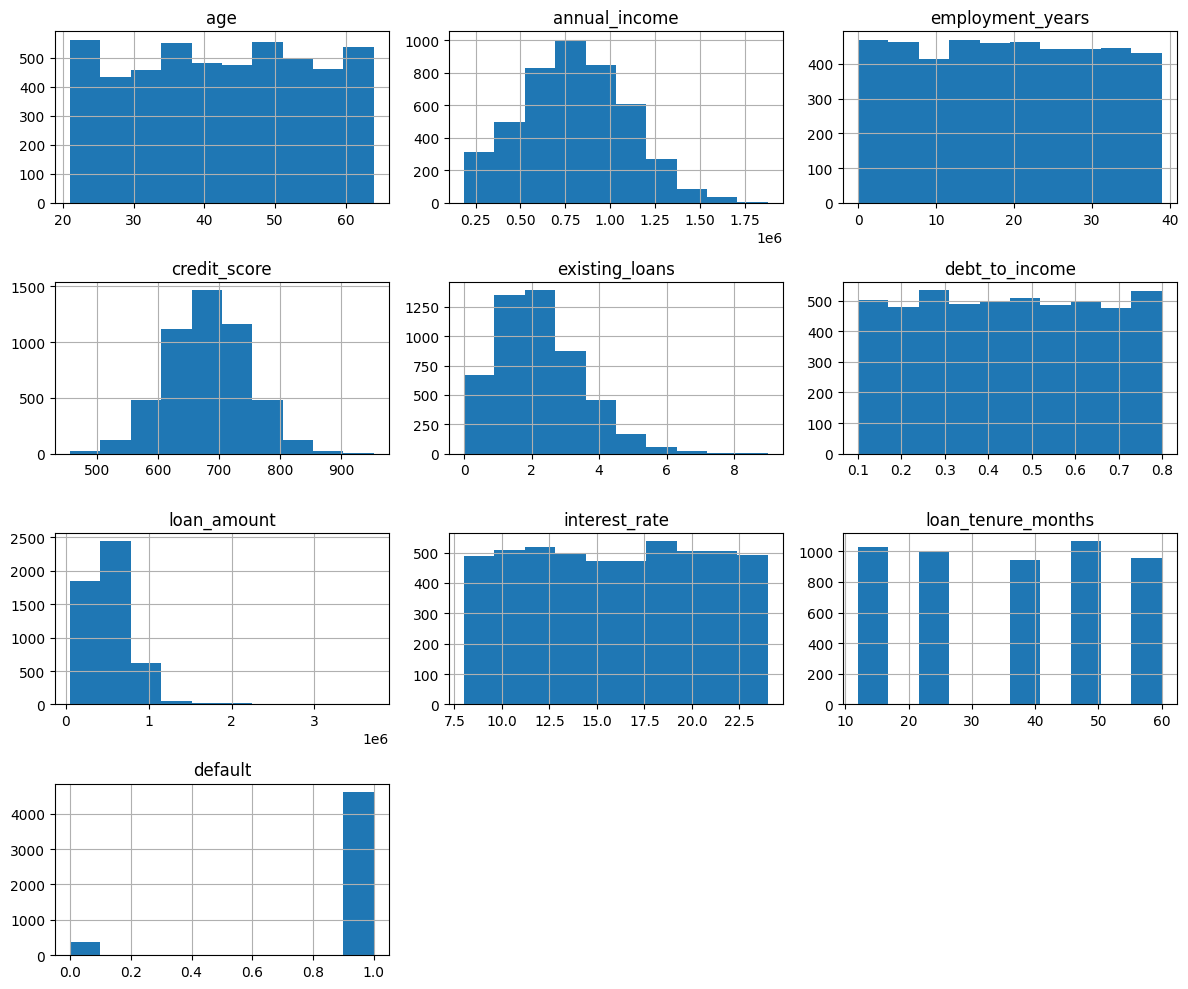

In [19]:
noisy_data.hist(figsize = (12,10))
plt.tight_layout()
plt.show()

In [20]:
# Outlier IQR method
# IQR--Interquartile Range: range btwn 25th and 75th percentiles
def detect_outliers_iqr(df ,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [21]:
detect_outliers_iqr(noisy_data, "loan_amount").shape

(91, 10)

In [22]:
# Credit Score Vs Default
noisy_data.groupby("default")["credit_score"].mean()    

default
0    691.615920
1    679.517526
Name: credit_score, dtype: float64

In [23]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import seaborn as sns

<Axes: >

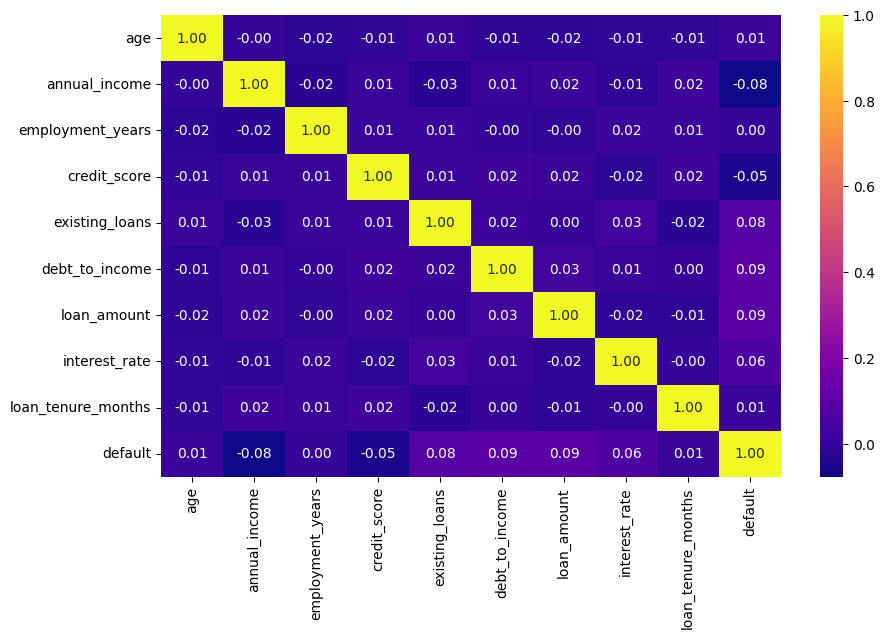

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(noisy_data.corr(), annot=True, fmt=".2f", cmap="plasma")

In [26]:
# filling missing values with col mean
noisy_data["annual_income"].fillna(
    noisy_data["annual_income"].mean(), inplace=True
)

C:\Users\shrey\AppData\Local\Temp\ipykernel_19236\3970355512.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  noisy_data["annual_income"].fillna(


In [27]:
noisy_data["employment_years"].fillna(
    noisy_data["employment_years"].mean(), inplace = True
)

C:\Users\shrey\AppData\Local\Temp\ipykernel_19236\35238435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  noisy_data["employment_years"].fillna(


In [ ]:
# Checking values after filling them
noisy_data.isnull().sum()

age                   0
annual_income         0
employment_years      0
credit_score          0
existing_loans        0
debt_to_income        0
loan_amount           0
interest_rate         0
loan_tenure_months    0
default               0
dtype: int64

In [29]:
# Handling Outliers - Winsorization (Percentile Capping)
loan_cap = noisy_data["loan_amount"].quantile(0.99)
# Capping values at the 99th percentile for extreme outliers
noisy_data["loan_amount"] = noisy_data["loan_amount"].clip(upper=loan_cap)

In [30]:
noisy_data.describe()

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.00000,5000.000000
mean,42.575000,8.021355e+05,19.312222,680.444263,1.993800,0.449900,5.181248e+05,16.001614,35.79600,0.923400
std,12.554597,2.777549e+05,10.968451,65.215125,1.416108,0.203016,2.765499e+05,4.624248,16.97867,0.265982
min,21.000000,1.858686e+05,0.000000,456.443537,0.000000,0.100126,5.000000e+04,8.001675,12.00000,0.000000
25%,32.000000,6.217671e+05,10.000000,636.639493,1.000000,0.275757,3.279659e+05,11.966318,24.00000,1.000000
50%,43.000000,8.021355e+05,19.312222,680.884791,2.000000,0.449444,4.967643e+05,16.059288,36.00000,1.000000
75%,53.000000,9.769726e+05,28.000000,722.829940,3.000000,0.625953,6.720131e+05,19.967538,48.00000,1.000000
max,64.000000,1.878525e+06,39.000000,953.330061,9.000000,0.799488,1.687632e+06,23.999311,60.00000,1.000000
